In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from tools import reduce_mem_usage

In [2]:
import matplotlib.font_manager as fm
path = 'c:\\windows\\fonts\\NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [3]:
data_dir = 'C:\\Users\\CSH\\Desktop\\lpoint\\data\\'

In [11]:
product = pd.read_csv(data_dir + 'product.csv')

C:\Users\CSH\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
product.sort_values(by=['CLNT_ID', 'SESS_ID']).head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
4830541,8,6964877,40,206218,색상:BLACK|사이즈:ONE SIZE / 1개,플라넷비,"38,000",1
4855606,8,7017688,74,206218,색상:BLACK|사이즈:ONE SIZE / 1개,플라넷비,"38,000",1
4386392,14,1156991,284,645262,색상:LL1G14817AIN|사이즈:FREE / 1개,로이드(주얼리),"29,900",1
5015932,14,1156991,284,369141,색상:LL2G16216RGB|사이즈:FREE / 1개,로이드,"39,900",1
56434,25,5317297,8,598634,피테로마 때박살:피테로마 때박살 120종,[유씨지],"39,800",1


In [5]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5024906 entries, 0 to 5024905
Data columns (total 8 columns):
CLNT_ID      int64
SESS_ID      int64
HITS_SEQ     int64
PD_C         int64
PD_ADD_NM    object
PD_BRA_NM    object
PD_BUY_AM    object
PD_BUY_CT    object
dtypes: int64(4), object(4)
memory usage: 306.7+ MB


In [6]:
product['PD_BUY_CT'] = product['PD_BUY_CT'].apply(lambda x: str(x))
product['PD_BUY_CT'] = product['PD_BUY_CT'].apply(lambda x: int(x.replace(',','')))

Session ID 별로 구매 건수에 대한 정보를 파악하기 위해 위 데이터를 CLNT ID, Session ID 를 기준으로 묶겠다.

In [7]:
buy_cnt_sess = product[['CLNT_ID', 'SESS_ID', 'PD_BUY_CT']].groupby(
    ['CLNT_ID', 'SESS_ID'], as_index=False).sum()

In [8]:
print("평균 구매 건수는 %d 건, 상위 99%%의 구매 건수는 %d 건이며 최고 구매 건수는 %d 건이다."\
      %(buy_cnt_sess['PD_BUY_CT'].mean(), buy_cnt_sess['PD_BUY_CT'].quantile(0.99), 
        buy_cnt_sess['PD_BUY_CT'].max()))

평균 구매 건수는 2 건, 상위 99%의 구매 건수는 11 건이며 최고 구매 건수는 2420 건이다.


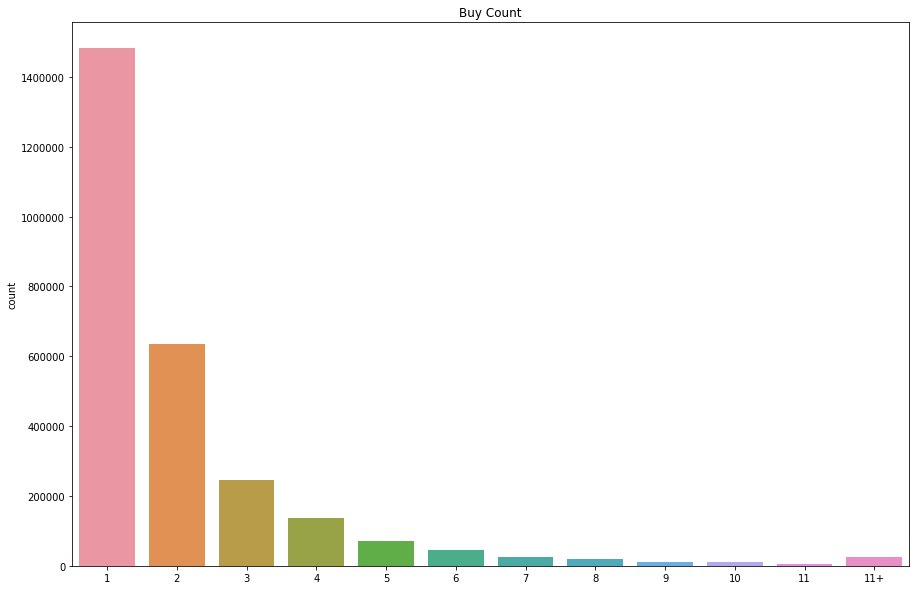

In [9]:
data = buy_cnt_sess.copy()
data.loc[data['PD_BUY_CT'] > data['PD_BUY_CT'].quantile(0.99)] = '11+'
plt.figure(figsize=(15,10))
sns.countplot(sorted(data['PD_BUY_CT'].astype(str), key = lambda x: x if len(x) == 1 else '9' + x))
plt.title('Buy Count')
plt.show()

구매 건수가 변수들과 어떤 상관 관계를 보이는지 한번 살펴보겠다. 먼저 총 페이지 조회 건수가 구매 건수와 어떤 관계를 보이는지 살펴보겠다.

# 총 페이지 조회 건수

In [17]:
session = pd.read_csv(data_dir + 'session.csv')

In [18]:
session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2712907 entries, 0 to 2712906
Data columns (total 9 columns):
CLNT_ID            int64
SESS_ID            int64
SESS_SEQ           int64
SESS_DT            int64
TOT_PAG_VIEW_CT    float64
TOT_SESS_HR_V      object
DVC_CTG_NM         object
ZON_NM             object
CITY_NM            object
dtypes: float64(1), int64(4), object(4)
memory usage: 186.3+ MB


C:\Users\CSH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


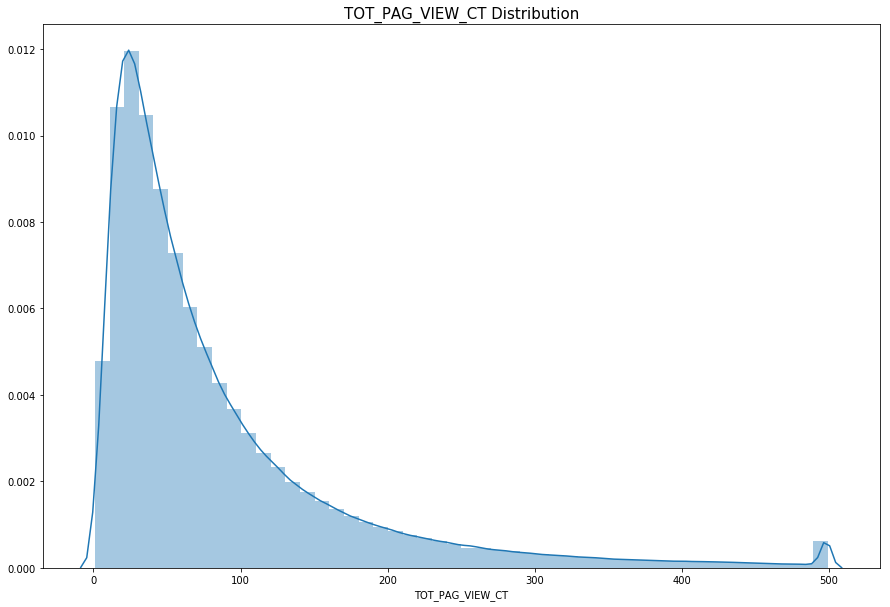

In [12]:
data = session['TOT_PAG_VIEW_CT'][~session['TOT_PAG_VIEW_CT'].isnull()]
plt.figure(figsize = (15,10))
plt.title("TOT_PAG_VIEW_CT Distribution", fontsize=15)
sns.distplot(data)
plt.show()

In [13]:
print("평균 페이지 조회 건 수는 %d 건, 상위 99%%의 조회 건수는 %d 건이며 최고 조회 건수는 %d 건이다."\
      %(session['TOT_PAG_VIEW_CT'].mean(), session['TOT_PAG_VIEW_CT'].quantile(0.99), 
        session['TOT_PAG_VIEW_CT'].max()))

평균 페이지 조회 건 수는 85 건, 상위 99%의 조회 건수는 448 건이며 최고 조회 건수는 499 건이다.


In [14]:
buy_cnt_sess_merged = buy_cnt_sess.merge(session, on = ['CLNT_ID', 'SESS_ID'], 
                                        how = 'left')

In [15]:
buy_cnt_sess_merged.isnull().sum(axis=0)

CLNT_ID                0
SESS_ID                0
PD_BUY_CT              0
SESS_SEQ               0
SESS_DT                0
TOT_PAG_VIEW_CT      274
TOT_SESS_HR_V      14202
DVC_CTG_NM             0
ZON_NM                 0
CITY_NM                0
dtype: int64

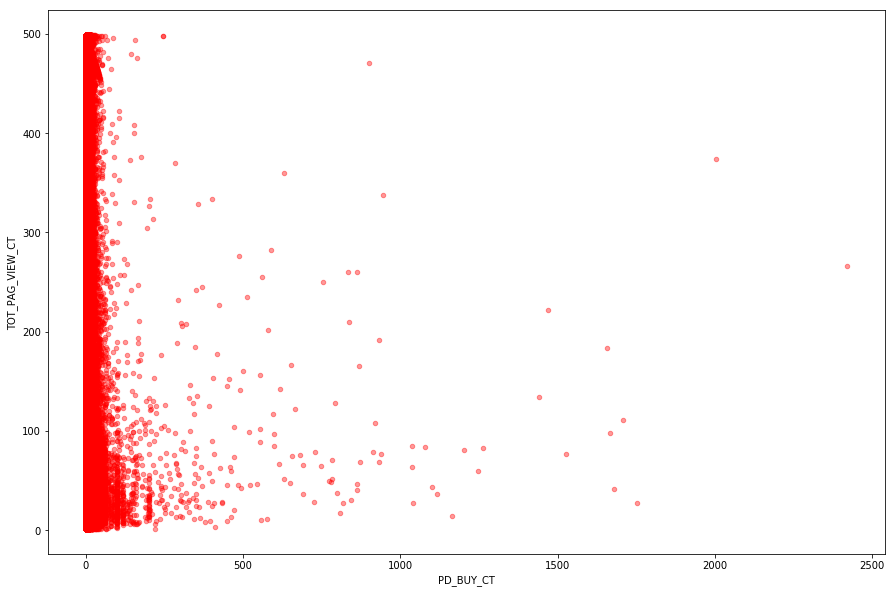

구매 건수와 총 페이지 조회 건수 간의 상관관계: 0.051


In [16]:
data = buy_cnt_sess_merged[~buy_cnt_sess_merged['TOT_PAG_VIEW_CT'].isnull()]
data.plot(kind='scatter', x="PD_BUY_CT", y="TOT_PAG_VIEW_CT", alpha=0.4, color='red',
         figsize=(15,10))
plt.show()
print("구매 건수와 총 페이지 조회 건수 간의 상관관계: %.3f" %np.corrcoef(data['TOT_PAG_VIEW_CT'], data['PD_BUY_CT'])[1,0])

특별한 관계가 보이지 않는다.
이번에는 총 세션 시간값과 구매 건수 간에 상관 관계를 확인해보겠다.

# 총 세션 시간 값

C:\Users\CSH\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\CSH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


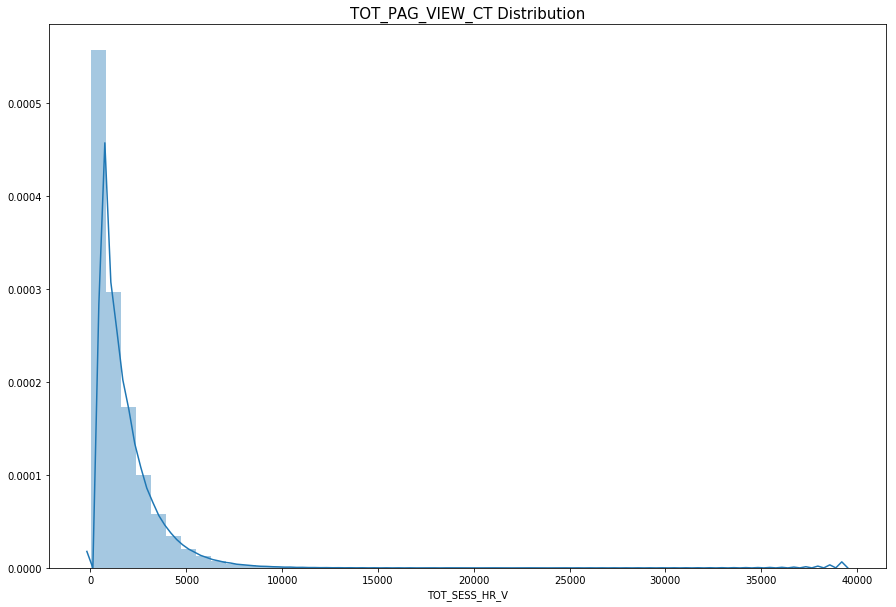

In [17]:
data = buy_cnt_sess_merged[~buy_cnt_sess_merged['TOT_SESS_HR_V'].isnull()][buy_cnt_sess_merged['PD_BUY_CT']<50]
data['TOT_SESS_HR_V'] = data['TOT_SESS_HR_V'].apply(lambda x: int(x.replace(',','')))
plt.figure(figsize = (15,10))
plt.title("TOT_PAG_VIEW_CT Distribution", fontsize=15)
sns.distplot(data['TOT_SESS_HR_V'])
plt.show()

In [18]:
data = session['TOT_SESS_HR_V']
data = data[~data.isnull()]
data = data.apply(lambda x: int(x.replace(',','')))
print("총 세션 시간 값은 %d 초, 상위 99%%의 시간 값은 %d 초이며 최고 세션 시간 값은 %d 초이다."\
      %(data.mean(), data.quantile(0.99), data.max()))

총 세션 시간 값은 1451 초, 상위 99%의 시간 값은 6989 초이며 최고 세션 시간 값은 39329 초이다.


C:\Users\CSH\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


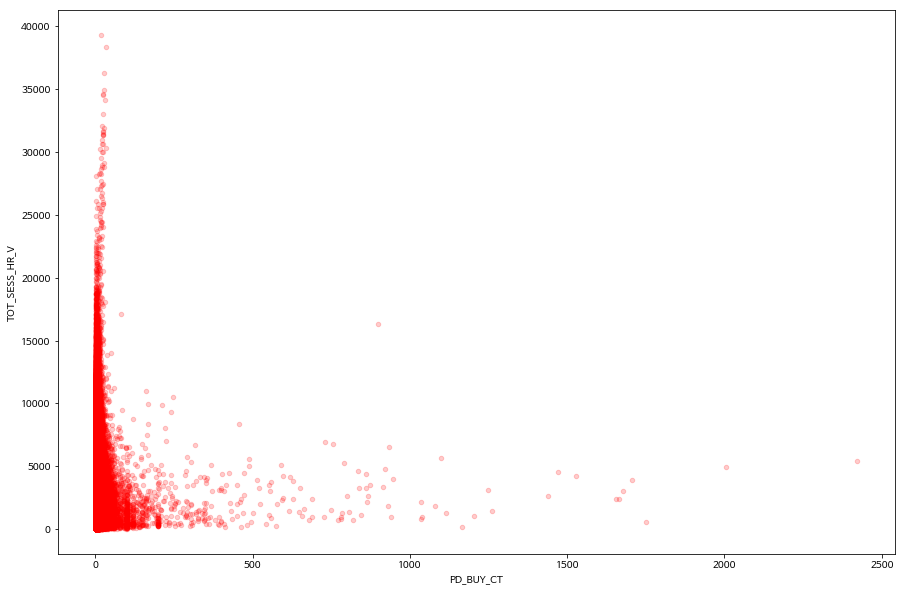

구매 건수와 총 세션 시간값 간의 상관관계: 0.067


In [95]:
data = buy_cnt_sess_merged[~buy_cnt_sess_merged['TOT_SESS_HR_V'].isnull()]
data['TOT_SESS_HR_V'] = data['TOT_SESS_HR_V'].apply(lambda x: int(x.replace(",","")))
data.plot(kind='scatter', x="PD_BUY_CT", y="TOT_SESS_HR_V", alpha=0.2, color='red',
         figsize=(15,10))
plt.show()
print("구매 건수와 총 세션 시간값 간의 상관관계: %.3f" %np.corrcoef(data['PD_BUY_CT'], data['TOT_SESS_HR_V'])[1,0])

구매카운트가 약 50 미만인 구간에서는 어느정도 양의 상관관계를 보이고 있다. 50 미만인 고객들만 선별하여 다시 살펴보자

C:\Users\CSH\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


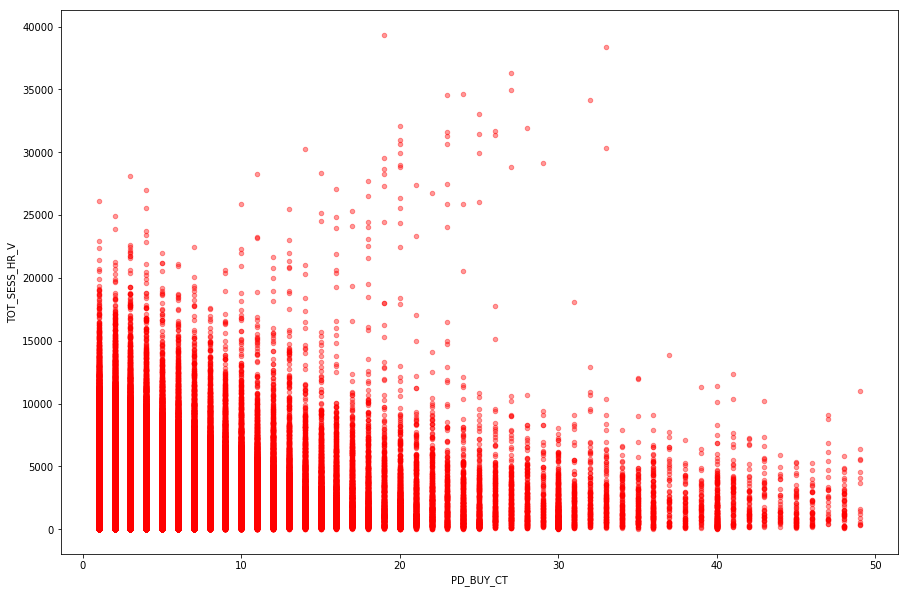

구매 건수와 총 세션 시간 값 간의 상관관계: 0.171


In [20]:
data = buy_cnt_sess_merged[~buy_cnt_sess_merged['TOT_SESS_HR_V'].isnull()][buy_cnt_sess_merged['PD_BUY_CT']<50]
data['TOT_SESS_HR_V'] = data['TOT_SESS_HR_V'].apply(lambda x: int(x.replace(',','')))
data.plot(kind='scatter', x='PD_BUY_CT', y='TOT_SESS_HR_V', alpha=0.4, color='red',
         figsize=(15,10))
plt.show()

print('구매 건수와 총 세션 시간 값 간의 상관관계: %.3f' %np.corrcoef(data['TOT_SESS_HR_V'], data['PD_BUY_CT'])[1,0])

C:\Users\CSH\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


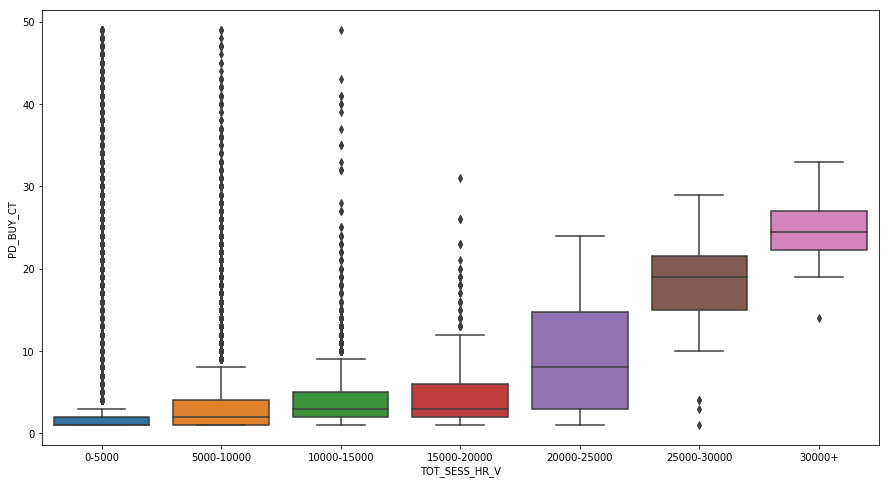

In [21]:
data = buy_cnt_sess_merged[~buy_cnt_sess_merged['TOT_SESS_HR_V'].isnull()][buy_cnt_sess_merged['PD_BUY_CT']<50]
data['TOT_SESS_HR_V'] = data['TOT_SESS_HR_V'].apply(lambda x: int(x.replace(',','')))
data['TOT_SESS_HR_V'] = pd.cut(data['TOT_SESS_HR_V'], [0, 5000,10000, 15000, 20000, 25000, 30000,10e+10],
                              labels = ['0-5000', '5000-10000', '10000-15000', '15000-20000',
                                       '20000-25000', '25000-30000', '30000+'])
plt.figure(figsize=(15,8))
sns.boxplot(x='TOT_SESS_HR_V', y='PD_BUY_CT', data=data)
plt.show()

구매 건수가 50 미만인 고객들을 대상으로 살펴본 총 세션 시간값과 어느 정도 정비례 하는 경향을 볼 수 있다.

# 기기 유형

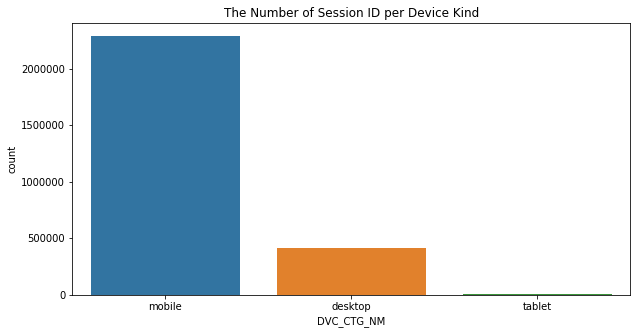

In [22]:
data =session['DVC_CTG_NM']
plt.figure(figsize=(10,5))
sns.countplot(data)
plt.title("The Number of Session ID per Device Kind")
plt.show()

In [23]:
data =session['DVC_CTG_NM']
print("mobile로는 총 %d 번, desktop로는 총 %d 번, tablet로는 총 %d 번의 거래가 이루어졌다." % ((data=='mobile').sum(), 
                                                                         (data=='desktop').sum(), (data=='tablet').sum()))

mobile로는 총 2289681 번, desktop로는 총 411169 번, tablet로는 총 12057 번의 거래가 이루어졌다.


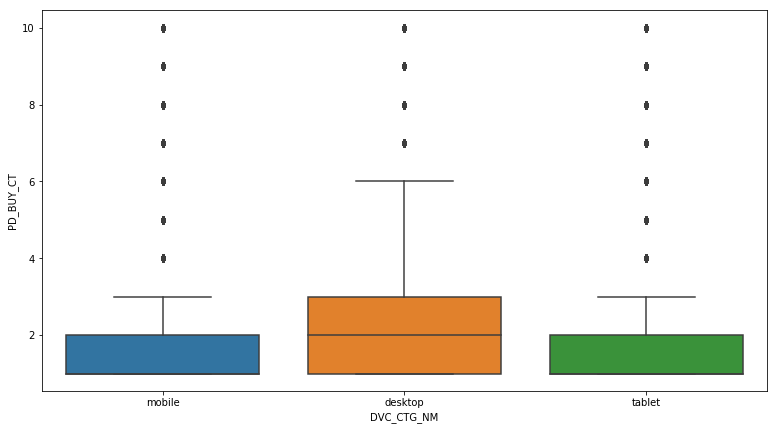

mobile 유저의 평균 구매 건수는 1.864522 건, desktop 유저의 평균 구매 건수는 2.337450 건, tablet 유저의 평균 구매 건수는 2.019525 건이다


In [24]:
data = buy_cnt_sess_merged[buy_cnt_sess_merged['PD_BUY_CT'] < buy_cnt_sess_merged['PD_BUY_CT'].quantile(0.99)]
plt.figure(figsize=(13,7))
sns.boxplot(x = 'DVC_CTG_NM', y = 'PD_BUY_CT', data=data)
plt.show()
print("mobile 유저의 평균 구매 건수는 %f 건, desktop 유저의 평균 구매 건수는 %f 건, tablet 유저의 평균 구매 건수는 %f 건이다"\
      %(data[data['DVC_CTG_NM']=='mobile']['PD_BUY_CT'].mean(), data[data['DVC_CTG_NM']=='desktop']['PD_BUY_CT'].mean(),
       data[data['DVC_CTG_NM']=='tablet']['PD_BUY_CT'].mean()))

Desktop 유저가 가장 구매 건수가 높고, 그 다음으로 Tablet 유저, Mobile 유저 임을 알 수 있다.

# 지역대분류

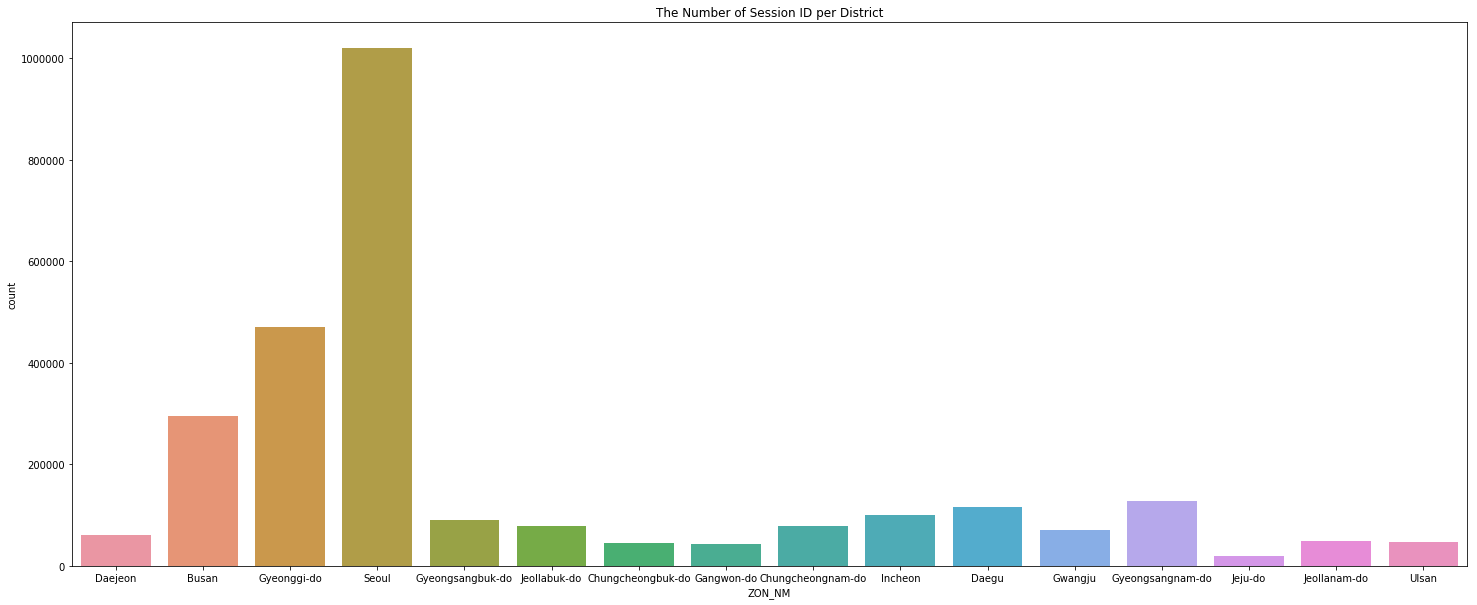

In [25]:
data =session['ZON_NM']
plt.figure(figsize=(25,10))
sns.countplot(data)
plt.title("The Number of Session ID per District")
plt.show()

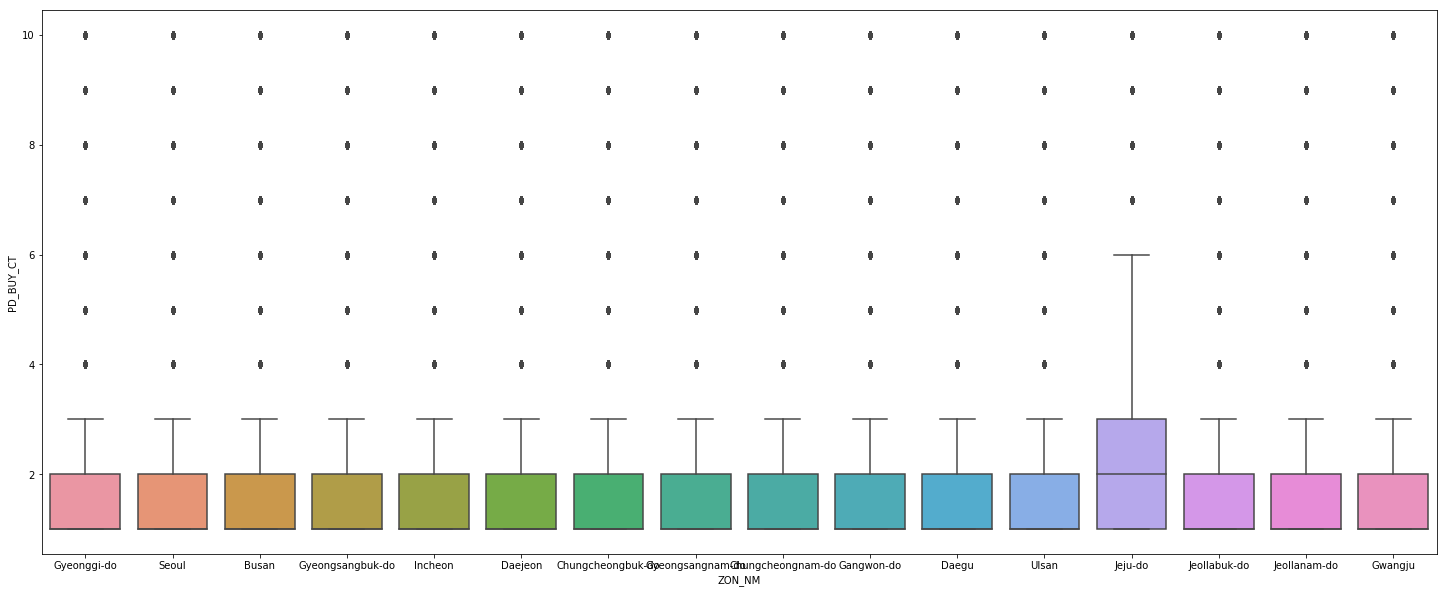

Gyeonggi-do 의 평균 구매 건수 : 1.952725 건
Seoul 의 평균 구매 건수 : 1.882643 건
Busan 의 평균 구매 건수 : 1.923000 건
Gyeongsangbuk-do 의 평균 구매 건수 : 2.003166 건
Incheon 의 평균 구매 건수 : 1.948814 건
Daejeon 의 평균 구매 건수 : 1.975351 건
Chungcheongbuk-do 의 평균 구매 건수 : 2.010937 건
Gyeongsangnam-do 의 평균 구매 건수 : 1.987385 건
Chungcheongnam-do 의 평균 구매 건수 : 2.026899 건
Gangwon-do 의 평균 구매 건수 : 2.000071 건
Daegu 의 평균 구매 건수 : 1.936361 건
Ulsan 의 평균 구매 건수 : 1.966541 건
Jeju-do 의 평균 구매 건수 : 2.123274 건
Jeollabuk-do 의 평균 구매 건수 : 2.015678 건
Jeollanam-do 의 평균 구매 건수 : 2.056949 건
Gwangju 의 평균 구매 건수 : 1.997154 건


In [26]:
data = buy_cnt_sess_merged[buy_cnt_sess_merged['PD_BUY_CT'] < buy_cnt_sess_merged['PD_BUY_CT'].quantile(0.99)]
plt.figure(figsize=(25,10))
sns.boxplot(x = 'ZON_NM', y = 'PD_BUY_CT', data=data)
plt.show()

zon_list = data['ZON_NM'].unique()
for zon in zon_list:
    print("%s 의 평균 구매 건수 : %f 건" %(zon, data[data['ZON_NM']==zon]['PD_BUY_CT'].mean()))

의외로 평균 구매 건수가 가장 높은 지역은 제주도, 가장 낮은 지역은 서울인 것으로 드러났다. 지역별 1인당 gdp가 가장 큰 곳이 서울인 것을 감안할 때 예상 밖의 결과라고 할 수 있다. 과연 구매 건수말고 구매 총액에서도 그럴지 알아보겠다.

In [27]:
product['PD_BUY_AM'] = product['PD_BUY_AM'].apply(lambda x: int(x.replace(',','')))
buy_amnt_sess = product[['CLNT_ID', 'SESS_ID', 'PD_BUY_AM']].groupby(['CLNT_ID', 'SESS_ID'], as_index=False).sum()

In [28]:
buy_amnt_sess_merged = buy_amnt_sess.merge(session, on=['CLNT_ID', 'SESS_ID'], how='left')

C:\Users\CSH\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\CSH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


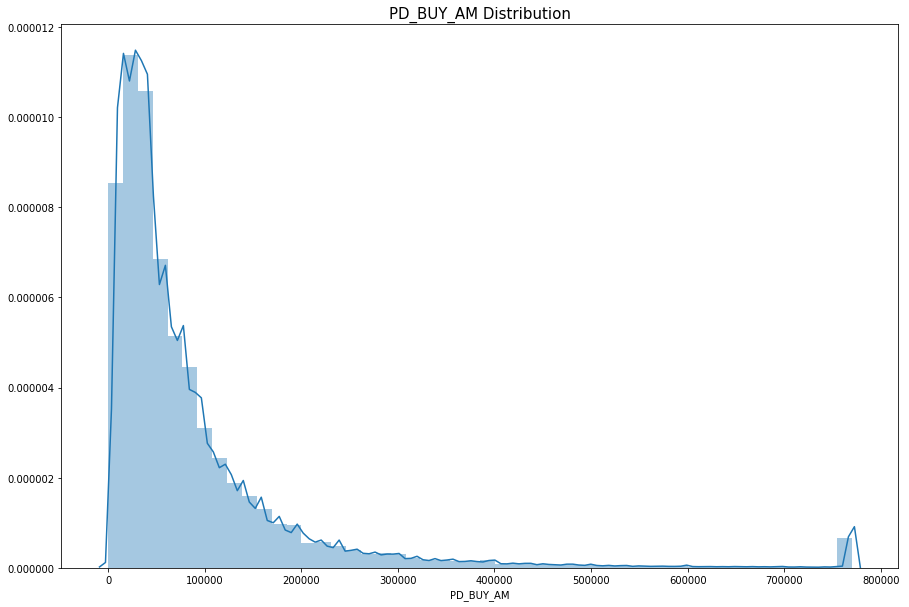

In [29]:
data = buy_amnt_sess_merged['PD_BUY_AM']
data[data>data.quantile(0.99)] = data.quantile(0.99)
plt.figure(figsize = (15,10))
plt.title("PD_BUY_AM Distribution", fontsize=15)
sns.distplot(data)
plt.show()

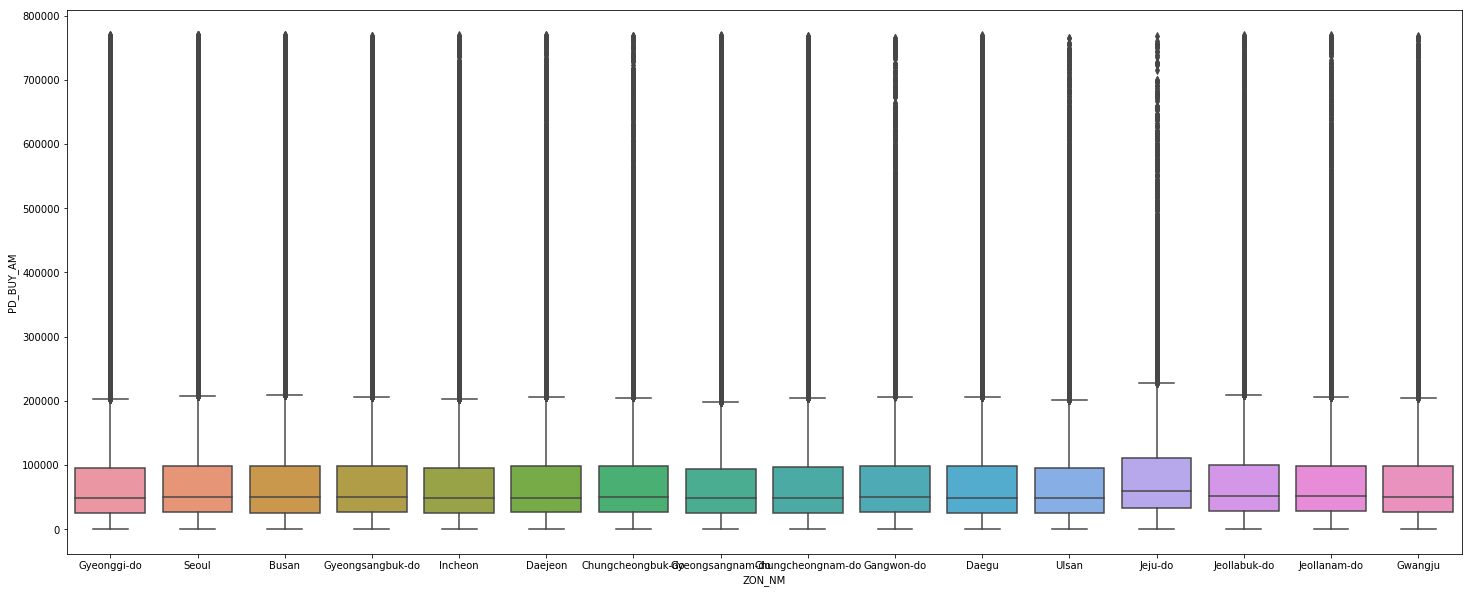

Gyeonggi-do 의 평균 구매 액수 : 78505.027784 원
Seoul 의 평균 구매 액수 : 81704.804206 원
Busan 의 평균 구매 액수 : 80632.557025 원
Gyeongsangbuk-do 의 평균 구매 액수 : 79507.467060 원
Incheon 의 평균 구매 액수 : 78115.244429 원
Daejeon 의 평균 구매 액수 : 79798.480831 원
Chungcheongbuk-do 의 평균 구매 액수 : 80562.354516 원
Gyeongsangnam-do 의 평균 구매 액수 : 76391.426167 원
Chungcheongnam-do 의 평균 구매 액수 : 78943.533281 원
Gangwon-do 의 평균 구매 액수 : 80426.189193 원
Daegu 의 평균 구매 액수 : 79037.191515 원
Ulsan 의 평균 구매 액수 : 77372.076740 원
Jeju-do 의 평균 구매 액수 : 91652.067415 원
Jeollabuk-do 의 평균 구매 액수 : 82773.261503 원
Jeollanam-do 의 평균 구매 액수 : 80875.614974 원
Gwangju 의 평균 구매 액수 : 80234.224970 원


In [30]:
data = buy_amnt_sess_merged[buy_amnt_sess_merged['PD_BUY_AM'] < buy_amnt_sess_merged['PD_BUY_AM'].quantile(0.99)]
plt.figure(figsize=(25,10))
sns.boxplot(x = 'ZON_NM', y = 'PD_BUY_AM', data=data)
plt.show()

zon_list = data['ZON_NM'].unique()
for zon in zon_list:
    print("%s 의 평균 구매 액수 : %f 원" %(zon, data[data['ZON_NM']==zon]['PD_BUY_AM'].mean()))

지역마다 큰 차이가 거의 없는 반면에 제주도는 눈에 띄게 높은 것을 알 수 있다. 제주도의 구매 성향을 파악해보자

# 제주도의 구매 성향 파악하기

In [14]:
master = pd.read_csv(data_dir + 'master.csv')

In [15]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847652 entries, 0 to 847651
Data columns (total 5 columns):
PD_C        847652 non-null int64
PD_NM       847652 non-null object
CLAC1_NM    847652 non-null object
CLAC2_NM    847652 non-null object
CLAC3_NM    847652 non-null object
dtypes: int64(1), object(4)
memory usage: 32.3+ MB


In [86]:
prod_mas = product.merge(master, on='PD_C', how='left')
prod_mas_sess = prod_mas.merge(session, how='left', on=['CLNT_ID', 'SESS_ID'])

In [40]:
import matplotlib.font_manager as fm
path = 'c:\\windows\\fonts\\NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

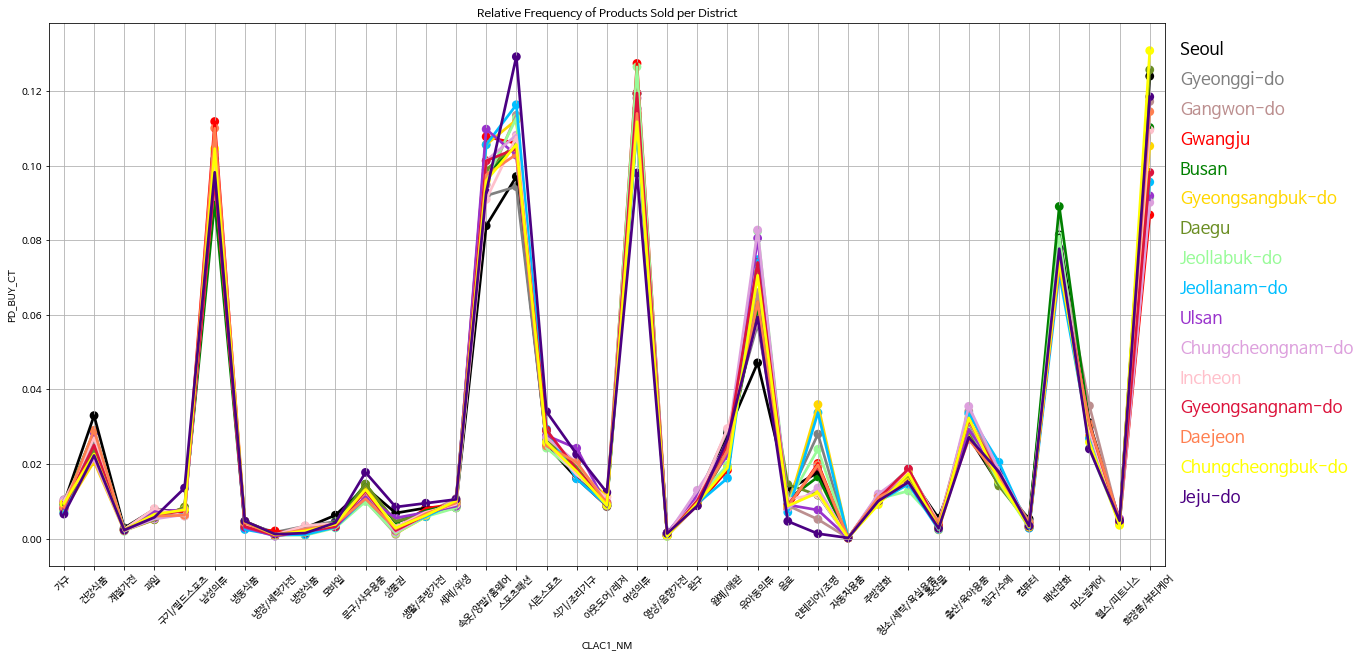

In [71]:
f,ax1 = plt.subplots(figsize =(20,10))
zone_list = prod_mas_sess['ZON_NM'].unique()
color_list = ['black','gray','rosybrown','red','green','gold','olivedrab','palegreen','deepskyblue',
              'darkorchid','plum','pink', 'crimson', 'coral', 'yellow', 'indigo', 'orchid', 'pink'][:len(zone_list)]

plt.title("Relative Frequency of Products Sold per District",)
plt.xticks(rotation=45)
for i in range(len(zone_list)):
    data = prod_mas_sess[prod_mas_sess['ZON_NM'] == zone_list[i]][['CLAC1_NM', 'PD_BUY_CT']].groupby('CLAC1_NM',as_index=False).sum()
    data['PD_BUY_CT'] = data['PD_BUY_CT']/data['PD_BUY_CT'].sum()
    sns.pointplot(x='CLAC1_NM',y='PD_BUY_CT',data=data, color=color_list[i],alpha=0.8)
for i in range(len(zone_list)):
    plt.text(37, 0.13-0.008*i, zone_list[i],color=color_list[i],fontsize = 17,style = 'italic')
plt.grid()
plt.show()

제주도는 스포츠 패션에 대한 구매가 타 지역에 비해 상당히 높음을 알 수 있다. 한편 인테리어나 건강식품, 여성의류, 패션잡화 등에서는 낮은 수치를 보였다.

# Desktop 유저들의 구매 성향 파악하기

In [94]:
product.head()

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT
0,4139680,7605037,12,642112,색상:워터멜론,[바비브라운],39000,1
1,4140076,10189797,13,570603,색상:BLK0_(BLK0)BLACK|사이즈:120 / 2개,데상트,39000,2
2,4142395,6158159,85,179538,(not set),[아베다],39000,1
3,4144914,7935714,12,554336,색상:블랙|사이즈:160cm(12~13세) / 1개,아디다스 키즈,39000,1
4,4144917,6406509,78,190306,5개,데코르테,39000,5


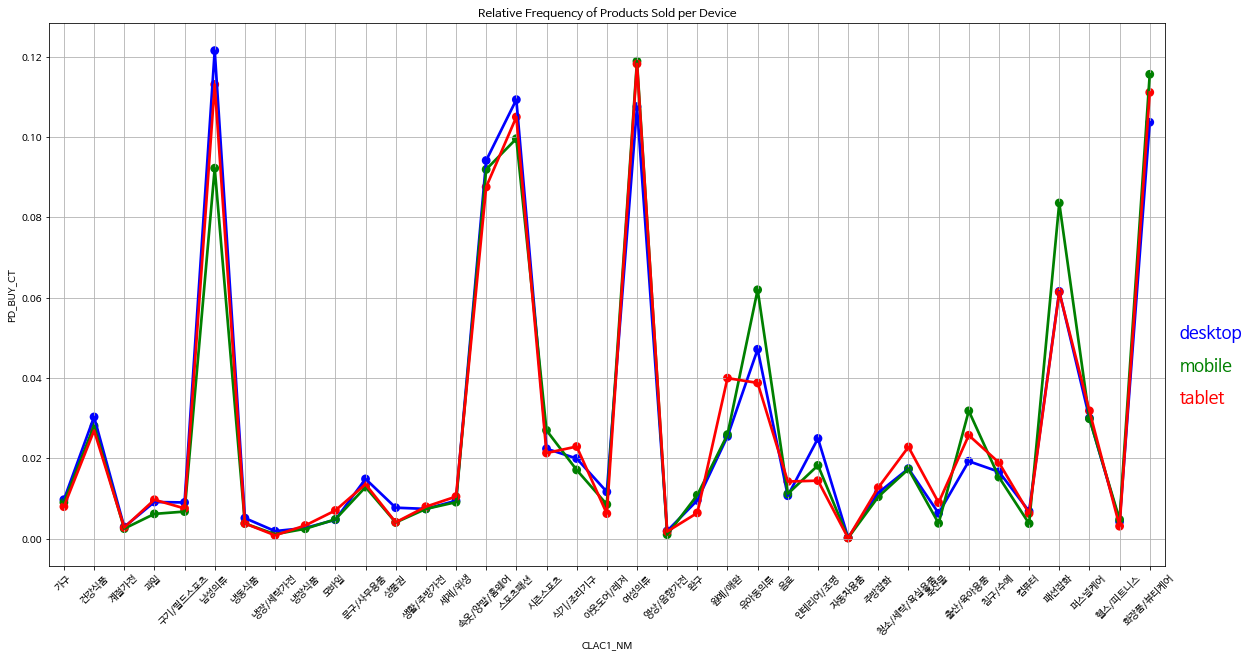

In [93]:
data = product[['CLNT_ID', 'SESS_ID', 'PD_C', 'PD_BUY_CT']].merge(master, on='PD_C', how='left')\
.merge(session[['CLNT_ID', 'SESS_ID','DVC_CTG_NM']], how='left', on=['CLNT_ID','SESS_ID'] )

plt.figure(figsize =(20,10))
device_list = data['DVC_CTG_NM'].unique()
color_list = ['blue','green','red']

plt.title("Relative Frequency of Products Sold per Device")
plt.xticks(rotation=45)
for i in range(len(device_list)):
    data_mini = data[data['DVC_CTG_NM'] == device_list[i]][['CLAC1_NM', 'PD_BUY_CT']].groupby('CLAC1_NM',as_index=False).sum()
    data_mini['PD_BUY_CT'] = data_mini['PD_BUY_CT']/data_mini['PD_BUY_CT'].sum()
    sns.pointplot(x='CLAC1_NM',y='PD_BUY_CT',data=data_mini, color=color_list[i],alpha=0.8)
for i in range(len(device_list)):
    plt.text(37, 0.05-0.008*i, device_list[i],color=color_list[i],fontsize = 17,style = 'italic')
plt.grid()
plt.show()

데스크탑은 남성의류, 스포츠에 대한 구매가 매우 높은 반면에 유아동의류, 육아용품, 패션잡화 등에서는 매우 낮은 구매율을 보이고 있다.

제주도 구매자의 경우나, 지금 데스크탑 구매자의 경우나 모두 스포츠 의류를 많이 산다는 공통점이 있다. 왜 스포츠 의류를 많이 찾는 집단에서는 평균적으로 높은 구매 건수를 보이는걸까? 스포츠 의류를 주로 찾는 고객들이 어떤 특성을 보이는지 좀더 자세히 살펴보자

# 스포츠 패션 구매 고객들의 성별과 연령대

In [ ]:
# 스포츠패션, (남성의류)를 구매하는 CLNT_ID의 성별, 연령대, 검색건수, (지역?, 세션값?, 페이지조회수? )

In [22]:
custom = pd.read_csv(data_dir + 'custom.csv')

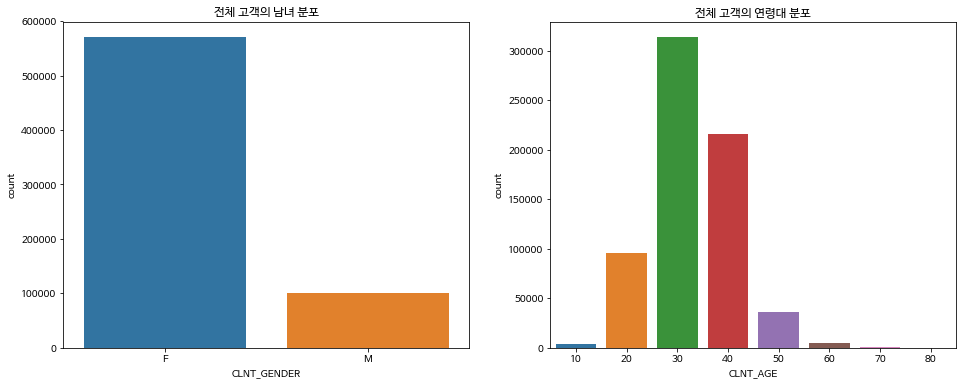

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
sns.countplot(custom['CLNT_GENDER'],ax=ax[0])
ax[0].set_title('전체 고객의 남녀 분포')
sns.countplot(custom['CLNT_AGE'], ax=ax[1])
ax[1].set_title('전체 고객의 연령대 분포')
plt.show()

In [32]:
prod_mas_cus = prod_mas.merge(custom, on='CLNT_ID', how='left')

In [27]:
prod_mas_cus.isnull().sum()

CLNT_ID              0
SESS_ID              0
HITS_SEQ             0
PD_C                 0
PD_ADD_NM            0
PD_BRA_NM            0
PD_BUY_AM            0
PD_BUY_CT            0
PD_NM                0
CLAC1_NM             0
CLAC2_NM             0
CLAC3_NM             0
CLNT_GENDER    1036319
CLNT_AGE       1036319
dtype: int64

In [35]:
prod_mas_cus.dropna(inplace=True)

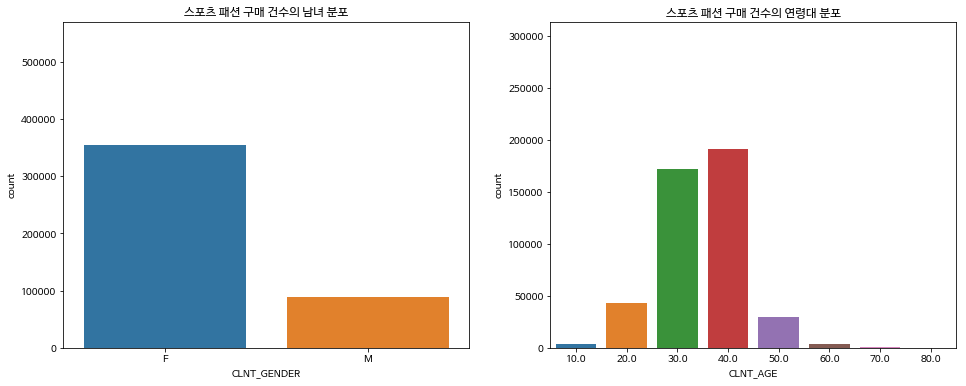

In [70]:
data = prod_mas_cus[prod_mas_cus['CLAC1_NM'] == '스포츠패션']
fig, ax = plt.subplots(1, 2, figsize=(16,6))

ax[0].set_title("스포츠 패션 구매 건수의 남녀 분포")
sns.countplot(data['CLNT_GENDER'], ax=ax[0])
ax[0].set_ylim(0, (custom['CLNT_GENDER']=='F').sum())

ax[1].set_title("스포츠 패션 구매 건수의 연령대 분포")
sns.countplot(data['CLNT_AGE'], ax=ax[1])
ax[1].set_ylim(0, (custom['CLNT_AGE']==30).sum())
plt.show()

스포츠 패션 구매 기록을 보니 남성과 40대의 비율이 확연히 높아졌음을 알 수 있다.

# 스포츠 패션 구매 고객들의 지역 정보

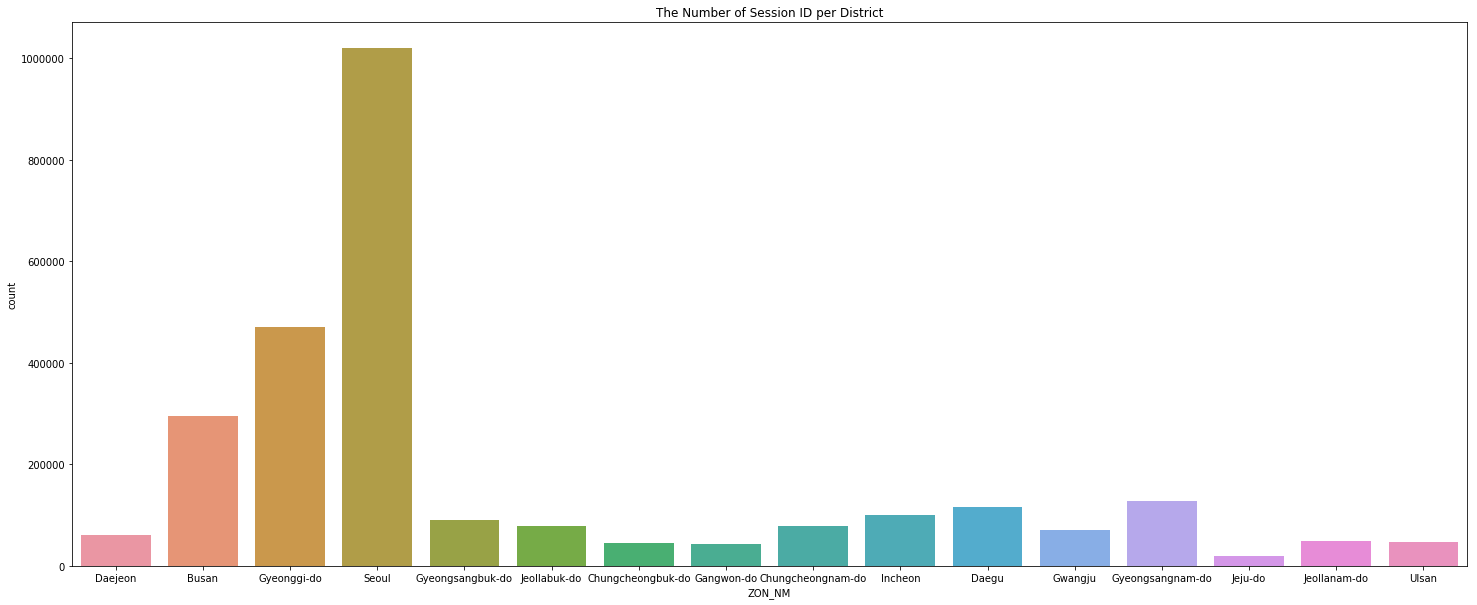

In [25]:
data =session['ZON_NM']
plt.figure(figsize=(25,10))
sns.countplot(data)
plt.title("The Number of Session ID per District")
plt.show()

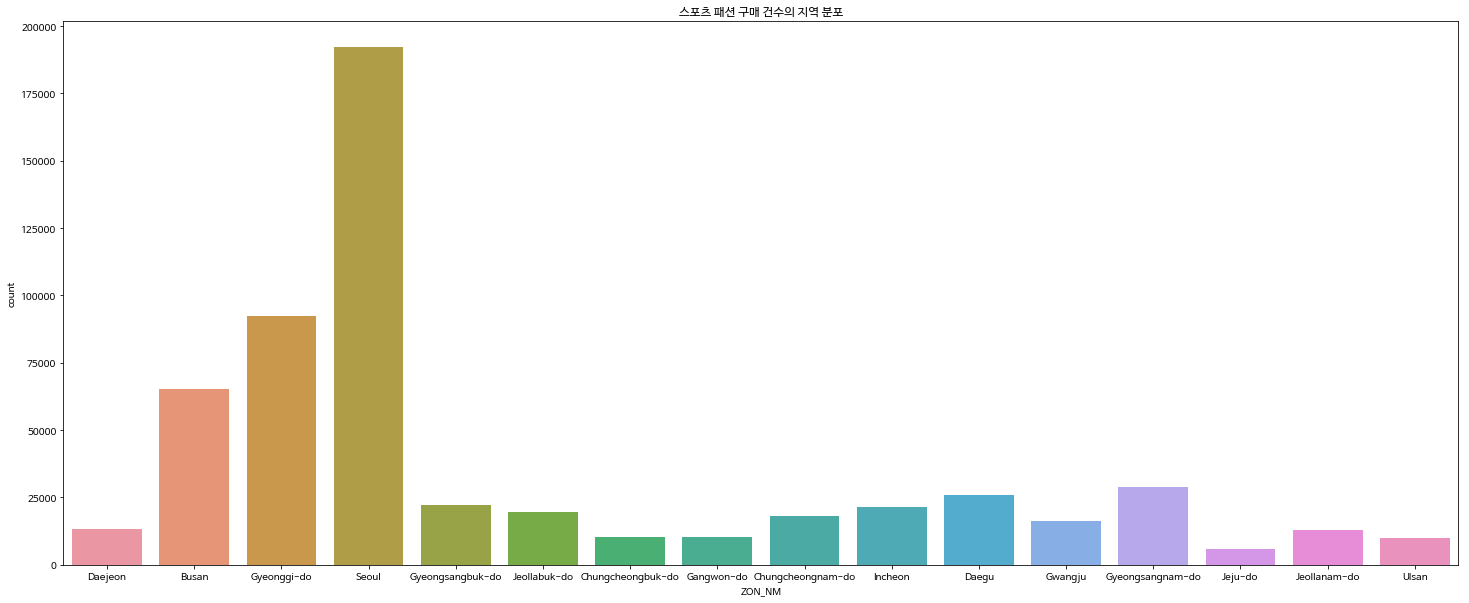

In [82]:
data = prod_mas_sess[prod_mas_sess['CLAC1_NM']=='스포츠패션']
plt.figure(figsize=(25,10))
plt.title("스포츠 패션 구매 건수의 지역 분포")
x_order = ['Daejeon', 'Busan', 'Gyeonggi-do', 'Seoul', 'Gyeongsangbuk-do', 'Jeollabuk-do', 'Chungcheongbuk-do', 'Gangwon-do',
          'Chungcheongnam-do', 'Incheon', 'Daegu', 'Gwangju', 'Gyeongsangnam-do', 'Jeju-do', 'Jeollanam-do', 'Ulsan']
sns.countplot(data['ZON_NM'], order=x_order)
plt.show()

지역 분포는 전체 고객의 분포와 거의 차이가 없음을 알 수 있다.

# 스포츠 패션 구매 고객들의 총 세션 시간 값

C:\Users\CSH\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\CSH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


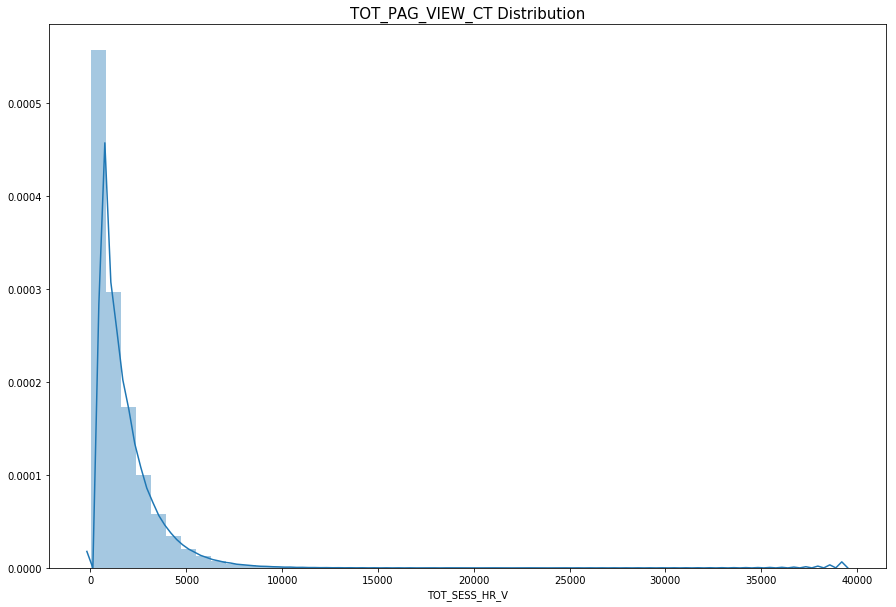

In [17]:
data = buy_cnt_sess_merged[~buy_cnt_sess_merged['TOT_SESS_HR_V'].isnull()][buy_cnt_sess_merged['PD_BUY_CT']<50]
data['TOT_SESS_HR_V'] = data['TOT_SESS_HR_V'].apply(lambda x: int(x.replace(',','')))
plt.figure(figsize = (15,10))
plt.title("TOT_PAG_VIEW_CT Distribution", fontsize=15)
sns.distplot(data['TOT_SESS_HR_V'])
plt.show()

C:\Users\CSH\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\CSH\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\CSH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an err

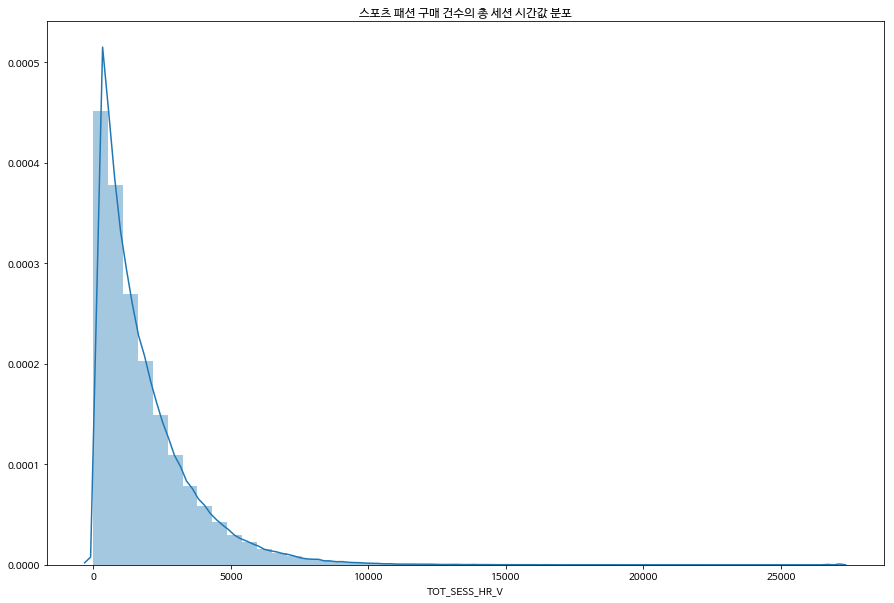

In [92]:
data = prod_mas_sess[prod_mas_sess['CLAC1_NM']=='스포츠패션']
data.dropna(inplace=True) # na 약 2307개 존재 
data['TOT_SESS_HR_V'] = data['TOT_SESS_HR_V'].apply(lambda x: int(str(x).replace(',','')))
plt.figure(figsize=(15,10))
plt.title("스포츠 패션 구매 건수의 총 세션 시간값 분포")
sns.distplot(data['TOT_SESS_HR_V'])
plt.show()

총 세션 시간 값이 전체 분포에 비해 상당히 높음을 알 수 있다.

C:\Users\CSH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


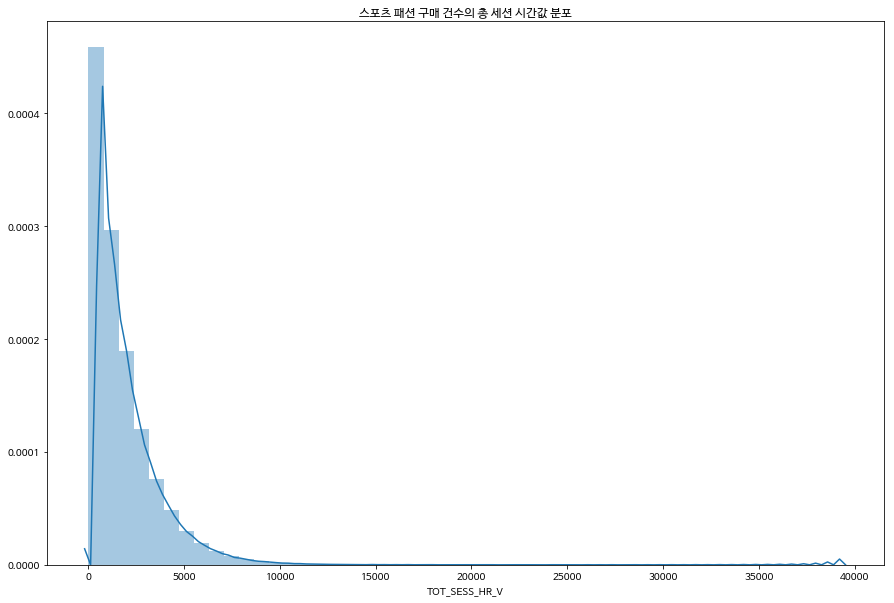

In [93]:
data = prod_mas_sess
data.dropna(inplace=True) # na 약 2307개 존재 
data['TOT_SESS_HR_V'] = data['TOT_SESS_HR_V'].apply(lambda x: int(str(x).replace(',','')))
plt.figure(figsize=(15,10))
plt.title("스포츠 패션 구매 건수의 총 세션 시간값 분포")
sns.distplot(data['TOT_SESS_HR_V'])
plt.show()